In [282]:
%matplotlib inline
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.color_cycle'] = ['#28598F', '#A68B05', '#DC3430']

In [247]:
def read_dos(dosfile):
    f = open(dosfile,'r')
    for file_length, l in enumerate(f.readlines()):
            line = l.strip()
            line_length = len(l.split())
    dos_data = np.zeros(shape=(file_length+1,line_length))
    f.close()
    f = open(dosfile,'r')
    for i, l in enumerate(f.readlines()):
        line = l.strip()
        line = line.split()
        for j in range(line_length):
            dos_data[i,j] = line[j]
    f.close()
    return dos_data

def dos_contribs(linker1,linker2,metals):
    contribs = np.zeros(shape=(len(linker1)))
    for i in range(1,len(linker1)):
        if metals[i]+linker1[i]+linker2[i] > 0.05:
            contribs[i-1] = metals[i]/(metals[i]+linker1[i]+linker2[i])
        else:
            contribs[i] = 0
    return contribs

def total_dos(dos_a,dos_b,dos_c):
    total_dos = np.zeros(shape=(len(dos_a)))
    for j, val in enumerate(dos_a):
        total_dos[j] = val + dos_b[j] + dos_c[j]
    total_dos = [val/max(total_dos) for val in total_dos]
    return total_dos

In [267]:
vacuum = 3.32
n_dos_7 = read_dos('ZIF-7/N_DOS')
n_dos_7_tot = [sum(point[1:]) for point in n_dos_7]
n_dos_7[:,0] = [val - vacuum for val in n_dos_7[:,0]]

c_dos_7 = read_dos('ZIF-7/C_DOS')
c_dos_7_tot = [sum(point[1:]) for point in c_dos_7]
c_dos_7[:,0] = [val - vacuum for val in c_dos_7[:,0]]

zn_dos_7 = read_dos('ZIF-7/Zn_DOS')
zn_dos_7_tot = [sum(point[1:]) for point in zn_dos_7]
zn_dos_7[:,0] = [val - vacuum for val in zn_dos_7[:,0]]

vacuum = 2.37
n_dos_8 = read_dos('ZIF-8/N_DOS')
n_dos_8_tot = [sum(point[1:]) for point in n_dos_8]
n_dos_8[:,0] = [val - vacuum for val in n_dos_8[:,0]]

c_dos_8 = read_dos('ZIF-8/C_DOS')
c_dos_8_tot = [sum(point[1:]) for point in c_dos_8]
c_dos_8[:,0] = [val - vacuum for val in c_dos_8[:,0]]

zn_dos_8 = read_dos('ZIF-8/Zn_DOS')
zn_dos_8_tot = [sum(point[1:]) for point in zn_dos_8]
zn_dos_8[:,0] = [val - vacuum for val in zn_dos_8[:,0]]

vacuum = 3.55
n_dos_9 = read_dos('ZIF-9/N_DOS')
n_dos_9_tot = [sum(point[1:]) for point in n_dos_9]
n_dos_9[:,0] = [val - vacuum for val in n_dos_9[:,0]]

c_dos_9 = read_dos('ZIF-9/C_DOS')
c_dos_9_tot = [sum(point[1:]) for point in c_dos_9]
c_dos_9[:,0] = [val - vacuum for val in c_dos_9[:,0]]

co_dos_9 = read_dos('ZIF-9/Co_DOS')
co_dos_9_tot = [sum(point[1:]) for point in co_dos_9]
co_dos_9[:,0] = [val - vacuum for val in co_dos_9[:,0]]

(0.01, 1)

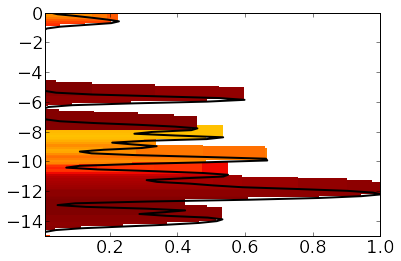

In [305]:
total_dos_7 = total_dos(n_dos_7_tot,c_dos_7_tot,zn_dos_7_tot)
dos_7_contributions = dos_contribs(n_dos_7_tot,c_dos_7_tot,zn_dos_7_tot)
fill = [1 for val in n_dos_7]
my_colors = []
cmap = plt.cm.jet
for i, m in enumerate(dos_7_contributions):
    if m > 0:
        my_colors.append(cmap(1-m))
plt.barh(n_dos_7[:,0],total_dos_7[:],color=my_colors, edgecolor = "none")
plt.plot(total_dos_7[:], n_dos_7[:,0],linewidth=2,color='black')
#plt.fill_betweenx(n_dos_7[:,0],total_dos_7[:],1.0,color='g')

plt.ylim(-15,0)
plt.xlim(0.01,1)

(-10, 0)

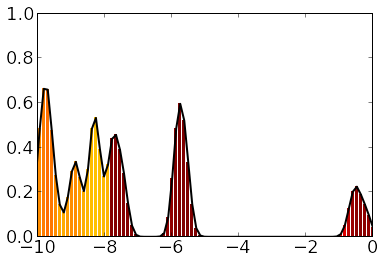

In [313]:
w=0.1
for i, m in enumerate(dos_7_contributions):
    if m > 0:
        my_colors.append(cmap(m))
plt.bar(n_dos_7[:,0],total_dos_7[:],width=w,color=my_colors, edgecolor = "none")
plt.plot( n_dos_7[:,0]+0.05,total_dos_7[:],linewidth=2,color='black')
plt.xlim(-10,0)

(-10, 0)

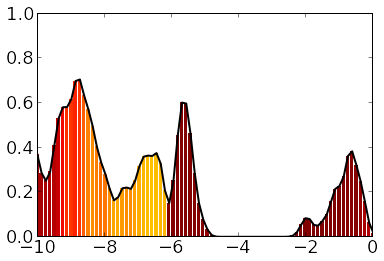

In [312]:
w=0.1
for i, m in enumerate(dos_9_contributions):
    if m > 0:
        my_colors.append(cmap(m))
plt.bar(n_dos_9[:,0],total_dos_9[:],width=w,color=my_colors, edgecolor = "none")
plt.plot( n_dos_9[:,0]+0.05,total_dos_9[:],linewidth=2,color='black')
plt.xlim(-10,0)

(0.01, 1)

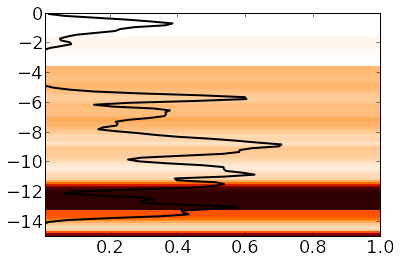

In [258]:
total_dos_9 = total_dos(n_dos_9_tot,c_dos_9_tot,co_dos_9_tot)
dos_9_contributions = dos_contribs(n_dos_9_tot,c_dos_9_tot,co_dos_9_tot)
fill = [2 for val in n_dos_9]
my_colors = []
cmap = plt.cm.gist_heat
for i, m in enumerate(dos_9_contributions):
    if m > 0:
        my_colors.append(cmap(1-m))
plt.barh(n_dos_9[:,0],fill,color=my_colors, edgecolor = "none")
plt.plot(total_dos_9[:], n_dos_9[:,0],linewidth=2,color='black')
plt.ylim(-15,0)
plt.xlim(0.01,1)

(-10, 0)

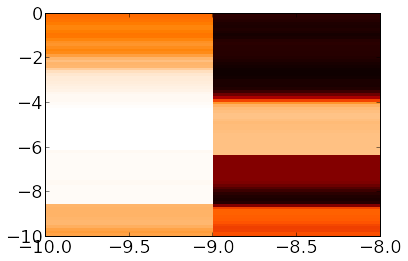

In [134]:
fill = [-10 for val in n_dos_7]
my_colors = []
cmap = plt.cm.gist_heat
for i, m in enumerate(dos_7_contributions):
    if m > 0:
        my_colors.append(cmap(1-m))
plt.bar(fill,n_dos_7[:,0],width=1.0,color=my_colors, edgecolor = "none")

fill = [-9 for val in n_dos_9]
my_colors = []
cmap = plt.cm.gist_heat
for i, m in enumerate(dos_9_contributions):
    if m > 0:
        my_colors.append(cmap(m))
plt.bar(fill,n_dos_9[:,0],width=1.0,color=my_colors, edgecolor = "none")

plt.xlim(-10,-8)
plt.ylim(-10,0)

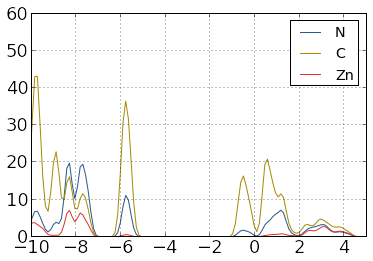

In [284]:
plt.plot(n_dos_7[:,0],n_dos_7_tot,label='N')
plt.plot(n_dos_7[:,0],c_dos_7_tot,label='C')
plt.plot(n_dos_7[:,0],zn_dos_7_tot,label='Zn')
plt.grid(True)
plt.xlim(-10,5)
plt.legend()

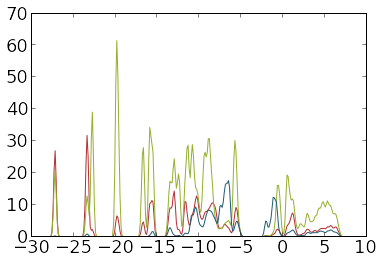

In [270]:
plt.plot(n_dos_9[:,0],n_dos_9_tot)
plt.plot(n_dos_9[:,0],c_dos_9_tot)
plt.plot(n_dos_9[:,0],co_dos_9_tot)

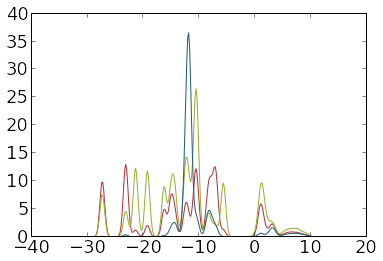

In [271]:
plt.plot(n_dos_8[:,0],n_dos_8_tot)
plt.plot(n_dos_8[:,0],c_dos_8_tot)
plt.plot(n_dos_8[:,0],zn_dos_8_tot)

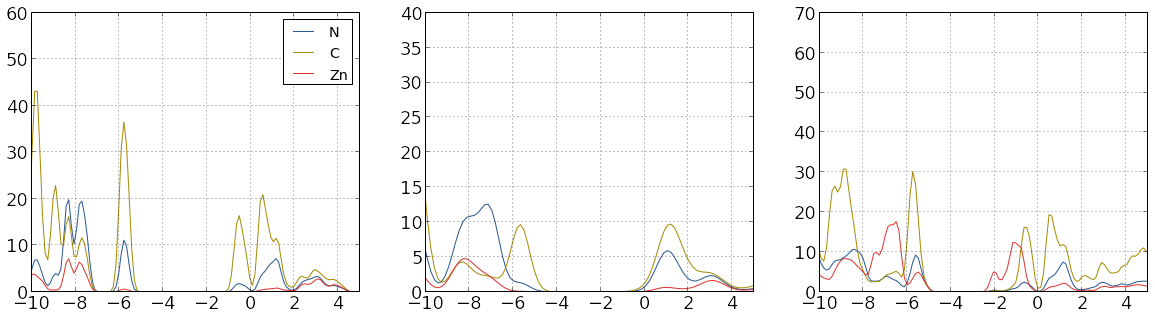

In [288]:
f, ax = plt.subplots(1, 3, sharex=False)
f.set_size_inches(20,5)

ax[0].plot(n_dos_7[:,0],n_dos_7_tot,label='N')
ax[0].plot(n_dos_7[:,0],c_dos_7_tot,label='C')
ax[0].plot(n_dos_7[:,0],zn_dos_7_tot,label='Zn')
ax[0].legend()

ax[1].plot(n_dos_8[:,0],n_dos_8_tot)
ax[1].plot(n_dos_8[:,0],c_dos_8_tot)
ax[1].plot(n_dos_8[:,0],zn_dos_8_tot)

ax[2].plot(n_dos_9[:,0],n_dos_9_tot)
ax[2].plot(n_dos_9[:,0],c_dos_9_tot)
ax[2].plot(n_dos_9[:,0],co_dos_9_tot)

for i in range(3):
    ax[i].grid(True)
    ax[i].set_xlim(-10,5)


In [292]:
print sum(c_dos_9_tot)/sum(co_dos_9_tot)

4.0873066714
